In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [ ]:
df = "/content/sample_data/advertising.csv"
data = pd.read_csv(df)
print(data.head())
print(data.isnull().sum())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model Evaluation Metrics:\nMSE: {mse}\nMAE: {mae}\nR-squared: {r2}")


Model Evaluation Metrics:
MSE: 2.907756910271093
MAE: 1.2748262109549346
R-squared: 0.9059011844150825


In [ ]:
joblib.dump(model, 'sales_prediction_model.pkl')


['sales_prediction_model.pkl']

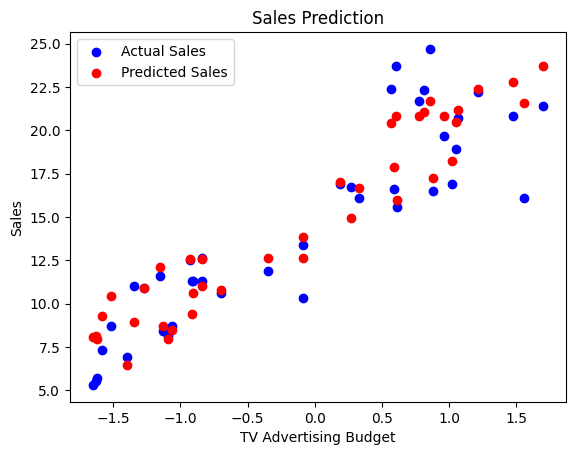

In [ ]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Sales')  # TV feature
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
loaded_model = joblib.load('sales_prediction_model.pkl')
new_data = [[230, 37, 69]]  # Example: TV, Radio, Newspaper
new_data_scaled = scaler.transform(new_data)
predicted_sales = loaded_model.predict(new_data_scaled)
print(f"Predicted sales for new data: {predicted_sales[0]}")


Predicted sales for new data: 21.28546573403439
